In [3]:
#Cargar las librerias necesrias
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
Data = pd.read_csv('./Titanic-Dataset.csv')
Data.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


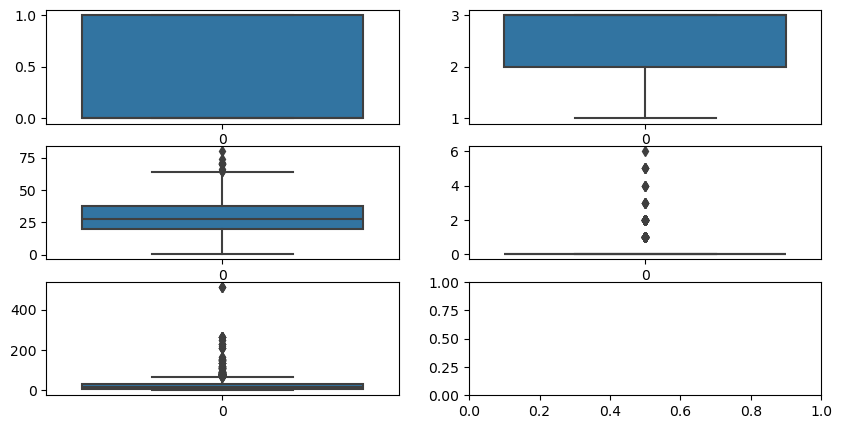

In [6]:
#Identificación de Datos Faltantes y Atípicos
fig, axs = plt.subplots(3,2, figsize = (10,5))
plt1 = sns.boxplot(Data['Survived'], ax = axs[0,0])
plt2 = sns.boxplot(Data['Pclass'], ax = axs[0,1])
plt1 = sns.boxplot(Data['Age'], ax = axs[1,0])
plt2 = sns.boxplot(Data['Parch'], ax = axs[1,1])
plt1 = sns.boxplot(Data['Fare'], ax = axs[2,0])

In [7]:
print("Cantidad de Registros nulos en Survived: ",Data['Survived'].isin([0]).sum())
print("Cantidad de Registros nulos en Pclass: ",Data['Pclass'].isin([0]).sum())
print("Cantidad de Registros nulos en Age: ",Data['Age'].isin([0]).sum())
print("Cantidad de Registros nulos en Parch: ",Data['Parch'].isin([0]).sum())
print("Cantidad de Registros nulos en Fare: ",Data['Fare'].isin([0]).sum())

Cantidad de Registros nulos en Survived:  549
Cantidad de Registros nulos en Pclass:  0
Cantidad de Registros nulos en Age:  0
Cantidad de Registros nulos en Parch:  678
Cantidad de Registros nulos en Fare:  15


In [8]:
# Reemplazar todos los nulos con el valor medio (promedio) de la columna.

Data['Survived']=Data['Survived'].replace(0,Data['Survived'].mean())
Data['Age']=Data['Age'].replace(0,Data['Age'].mean())
Data['Pclass']=Data['Pclass'].replace(0,Data['Pclass'].mean())
Data['Parch']=Data['Parch'].replace(0,Data['Parch'].mean())
Data['Fare']=Data['Fare'].replace(0,Data['Fare'].mean())

In [9]:
print("Cantidad de Registros nulos en Survived: ",Data['Survived'].isin([0]).sum())
print("Cantidad de Registros nulos en Pclass: ",Data['Pclass'].isin([0]).sum())
print("Cantidad de Registros nulos en Age: ",Data['Age'].isin([0]).sum())
print("Cantidad de Registros nulos en Parch: ",Data['Parch'].isin([0]).sum())
print("Cantidad de Registros nulos en Fare: ",Data['Fare'].isin([0]).sum())

Cantidad de Registros nulos en Survived:  0
Cantidad de Registros nulos en Pclass:  0
Cantidad de Registros nulos en Age:  0
Cantidad de Registros nulos en Parch:  0
Cantidad de Registros nulos en Fare:  0


In [10]:
#Conteo de Datos Atípicos

MinSurvi=0
MaxSurvi=1
AtipicosSurvi=((Data['Survived']<MinSurvi)|(Data['Survived']>MaxSurvi)).sum()
print("El total de datos atípicos en la columna Survived es de {}".format(AtipicosSurvi))

MinClas=1
MaxClas=3
AtipicoClas=((Data['Pclass']<MinClas)|(Data['Pclass']>MaxClas)).sum()
print("El total de datos atípicos en la columna Pclass es de {}".format(AtipicoClas))

MinAge=0
MaxAge=80
AtipicoAge=((Data['Age']<MinAge)|(Data['Age']>MaxAge)).sum()
print("El total de datos atípicos en la columna Age es de {}".format(AtipicoAge))

MinParch=0
MaxParch=2
AtipicoParch=((Data['Parch']<MinParch)|(Data['Parch']>MaxParch)).sum()
print("El total de datos atípicos en la columna Parch es de {}".format(AtipicoParch))

MinFare=0
MaxFare=250
AtipicoFare=((Data['Fare']<MinFare)|(Data['Fare']>MaxFare)).sum()
print("El total de datos atípicos en la columna Fare es de {}".format(AtipicoFare))

El total de datos atípicos en la columna Survived es de 0
El total de datos atípicos en la columna Pclass es de 0
El total de datos atípicos en la columna Age es de 0
El total de datos atípicos en la columna Parch es de 15
El total de datos atípicos en la columna Fare es de 9


In [11]:
# Filtramos Datos Atípicos
Data=Data[(Data['Parch']<MaxParch)&(Data['Parch']>MinParch)]
Data=Data[(Data['Fare']<MaxFare)&(Data['Fare']>MinFare)]

In [12]:
# Validamos si se removieron los datos atípicos
AtipicoParch=((Data['Parch']<MinParch)|(Data['Parch']>MaxParch)).sum()
print("El total de datos atípicos en la columna Parch es de {}".format(AtipicoParch))

AtipicoFare=((Data['Fare']<MinFare)|(Data['Fare']>MaxFare)).sum()
print("El total de datos atípicos en la columna Fare es de {}".format(AtipicoFare))

El total de datos atípicos en la columna Parch es de 0
El total de datos atípicos en la columna Fare es de 0


In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  793 non-null    int64  
 1   Survived     793 non-null    float64
 2   Pclass       793 non-null    int64  
 3   Name         793 non-null    object 
 4   Sex          793 non-null    object 
 5   Age          628 non-null    float64
 6   SibSp        793 non-null    int64  
 7   Parch        793 non-null    float64
 8   Ticket       793 non-null    object 
 9   Fare         793 non-null    float64
 10  Cabin        178 non-null    object 
 11  Embarked     791 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 80.5+ KB


In [14]:
# Total de personas Sobrevivientes
Data['Survived'] = Data['Survived'].astype(int)
Data['Survived'].value_counts()

Survived
0    498
1    295
Name: count, dtype: int64

In [15]:
Data[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
9,1
10,1


In [16]:
# Porcentaje de datos para entrenamiento (train) = 70% , y para prueba (test) = 30%
X = Data.drop(['Survived', 'Name','Age','Sex','Ticket','Cabin','Embarked'], axis=1)
Y = Data['Survived'] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state= 0)

In [17]:
print (X_train)

     PassengerId  Pclass  SibSp     Parch      Fare
241          242       3      1  0.381594   15.5000
65            66       3      1  1.000000   15.2458
814          815       3      0  0.381594    8.0500
38            39       3      2  0.381594   18.0000
831          832       2      1  1.000000   18.7500
..           ...     ...    ...       ...       ...
882          883       3      0  0.381594   10.5167
554          555       3      0  0.381594    7.7750
765          766       1      1  0.381594   77.9583
242          243       2      0  0.381594   10.5000
557          558       1      0  0.381594  227.5250

[555 rows x 5 columns]


In [18]:
print (y_train)

241    1
65     1
814    0
38     0
831    1
      ..
882    0
554    1
765    1
242    0
557    0
Name: Survived, Length: 555, dtype: int32


In [19]:
# Construimos el modelo de regresión logística 
mode_logistico = LogisticRegression(solver = "liblinear") 
mode_logistico.fit(X_train, y_train)   
# modelo de prediccion
Predi_mod_Logistico = mode_logistico.predict(X_test)

In [20]:
print (Predi_mod_Logistico)

[0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0]


In [21]:
print(classification_report(y_test,Predi_mod_Logistico))

              precision    recall  f1-score   support

           0       0.74      0.89      0.80       149
           1       0.71      0.47      0.57        89

    accuracy                           0.73       238
   macro avg       0.72      0.68      0.69       238
weighted avg       0.73      0.73      0.72       238



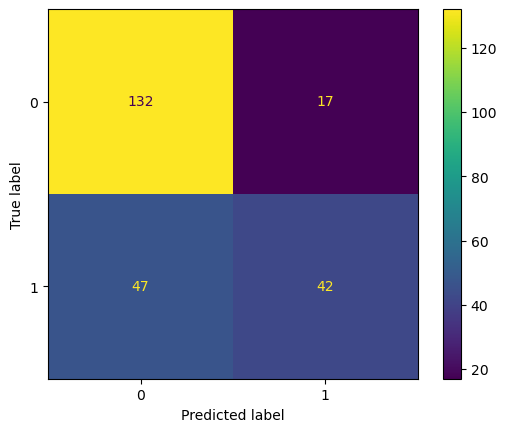

In [22]:
cm=confusion_matrix(y_test,Predi_mod_Logistico)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

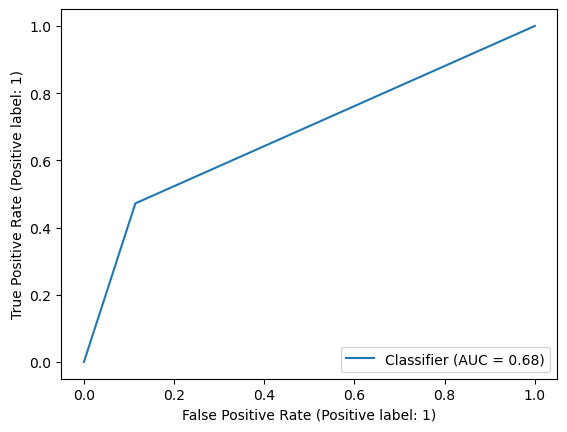

In [23]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, Predi_mod_Logistico)
plt.show()